In [6]:
import pandas as pd
import requests
import json
from pprint import pprint
from config import openWeatherKey
import gmaps
from THconfig import g_key
import matplotlib.pyplot as plt
gmaps.configure(api_key=g_key)

ModuleNotFoundError: No module named 'config'

In [7]:
#Pulling data from csv files and creating dataframe with disaster data
coordinates_csv = "output_data/NEW_coordinates.csv"
weatherDisasterCSV = "Resources/disaster_data.csv"
disaster_df = pd.read_csv(weatherDisasterCSV)
#desiredColumns = ["Dis No", "Year", "Seq", "Disaster Subgroup", "Disaster Type", "Disaster Subtype", "Disaster Subsubtype", "Entry Criteria", "ISO", "Location", "Start Month", "End Month", "Total Deaths", "No Injured", "No Affected", "No Homeless", "Total Affected", "Insured Damages ('000 US$)", "Total Damages ('000 US$)", "CPI"]
#disaster_df = disaster_df.loc[disaster_df["ISO"] == "USA", desiredColumns]
disaster_df

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,2000-0420-CAN,2000,420,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,Kill,...,14.0,11.0,140.0,NaN,700.0,840.0,NaN,10000.0,13000.0,67.355759
1,2001-0052-CAN,2001,52,Natural,Meteorological,Storm,NaN,NaN,NaN,Kill,...,10.0,11.0,NaN,NaN,30.0,30.0,NaN,NaN,NaN,69.259340
2,2000-0080-USA,2000,80,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Affect,...,22.0,3.0,NaN,231.0,NaN,231.0,NaN,NaN,NaN,67.355759
3,2000-0500-USA,2000,500,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Affect,...,14.0,NaN,NaN,175.0,NaN,175.0,NaN,NaN,166000.0,67.355759
4,2000-0919-USA,2000,919,Natural,Meteorological,Storm,NaN,NaN,NaN,SigDam,...,25.0,4.0,NaN,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,2019-0307-USA,2019,307,Natural,Hydrological,Flood,NaN,NaN,NaN,Affected,...,9.0,3.0,NaN,600.0,NaN,600.0,NaN,NaN,NaN,100.000000
533,2020-0148-USA,2020,148,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,Kill,...,14.0,38.0,200.0,NaN,NaN,200.0,NaN,NaN,1000000.0,NaN
534,2020-0011-USA,2020,11,Natural,Meteorological,Storm,Convective storm,Severe storm,NaN,Kill,...,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,1200000.0,NaN
535,2020-0082-USA,2020,82,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,Waiting,...,5.0,25.0,300.0,12000.0,NaN,12300.0,NaN,NaN,1100000.0,NaN


In [8]:
#Reading coordinates csv file and creating new dataframe
coordinates_location_df = pd.read_csv(coordinates_csv)
clean_coordinates_index = coordinates_location_df.index
coordinates_location_df = coordinates_location_df.loc[:, ["Location", "Dis No", "Lat", "Long"]]
coordinates_nw_df = coordinates_location_df.loc[(coordinates_location_df["Long"]<-110) & (coordinates_location_df["Lat"]>40)]
coordinates_nw_df

,Location,Dis No,Lat,Long
29,Juneau,2000-0338-USA,58.30,-134.42
33,Richland,2000-0338-USA,46.29,-119.28
66,Idaho,2000-0465-USA,44.50,-114.25
70,Oregon,2000-0465-USA,44.00,-120.50
74,Washington,2000-0465-USA,47.50,-120.50
159,Oregon,2001-0451-USA,44.00,-120.50
160,Washington,2001-0451-USA,47.50,-120.50
161,Idaho,2001-0451-USA,44.50,-114.25
210,Armstrong,2002-0310-USA,46.76,-117.23
221,Sumner,2002-0700-USA,47.20,-122.24


In [9]:
#I need to merge lat dataframes along Location


In [10]:
#I need to create a new dataframe combining the new combine quintant coordinates and the weather disaster data
combined_data_nw_df = pd.merge(coordinates_nw_df, disaster_df, on = "Dis No", how="left").rename(columns={"Location_x": "Location"})
combined_data_nw_df


,Location,Dis No,Lat,Long,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,Juneau,2000-0338-USA,58.30,-134.42,2000,338,Natural,Meteorological,Storm,Convective storm,...,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28500.0,67.355759
1,Richland,2000-0338-USA,46.29,-119.28,2000,338,Natural,Meteorological,Storm,Convective storm,...,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28500.0,67.355759
2,Idaho,2000-0465-USA,44.50,-114.25,2000,465,Natural,Climatological,Wildfire,Forest fire,...,NaN,14.0,NaN,1000.0,NaN,1000.0,NaN,NaN,1000000.0,67.355759
3,Oregon,2000-0465-USA,44.00,-120.50,2000,465,Natural,Climatological,Wildfire,Forest fire,...,NaN,14.0,NaN,1000.0,NaN,1000.0,NaN,NaN,1000000.0,67.355759
4,Washington,2000-0465-USA,47.50,-120.50,2000,465,Natural,Climatological,Wildfire,Forest fire,...,NaN,14.0,NaN,1000.0,NaN,1000.0,NaN,NaN,1000000.0,67.355759
5,Oregon,2001-0451-USA,44.00,-120.50,2001,451,Natural,Climatological,Wildfire,Forest fire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.259340
6,Washington,2001-0451-USA,47.50,-120.50,2001,451,Natural,Climatological,Wildfire,Forest fire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.259340
7,Idaho,2001-0451-USA,44.50,-114.25,2001,451,Natural,Climatological,Wildfire,Forest fire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.259340
8,Armstrong,2002-0310-USA,46.76,-117.23,2002,310,Natural,Meteorological,Storm,Convective storm,...,3.0,10.0,100.0,NaN,NaN,100.0,NaN,2000500.0,2200000.0,70.357819
9,Sumner,2002-0700-USA,47.20,-122.24,2002,700,Natural,Meteorological,Storm,Convective storm,...,10.0,36.0,115.0,3600.0,351.0,4066.0,NaN,450500.0,700000.0,70.357819


In [11]:
combined_data_nw_df["Disaster Type"].unique()

array(['Storm', 'Wildfire', 'Flood', 'Extreme temperature', 'Drought'],
      dtype=object)

In [12]:
#Creating a trimmed DF of dropped duplicates for more accurate calculations
trimmed_nw_df = combined_data_nw_df.drop_duplicates(subset= "Dis No", keep="first")
trimmed_nw_df

,Location,Dis No,Lat,Long,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,Juneau,2000-0338-USA,58.30,-134.42,2000,338,Natural,Meteorological,Storm,Convective storm,...,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28500.0,67.355759
2,Idaho,2000-0465-USA,44.50,-114.25,2000,465,Natural,Climatological,Wildfire,Forest fire,...,NaN,14.0,NaN,1000.0,NaN,1000.0,NaN,NaN,1000000.0,67.355759
5,Oregon,2001-0451-USA,44.00,-120.50,2001,451,Natural,Climatological,Wildfire,Forest fire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.259340
8,Armstrong,2002-0310-USA,46.76,-117.23,2002,310,Natural,Meteorological,Storm,Convective storm,...,3.0,10.0,100.0,NaN,NaN,100.0,NaN,2000500.0,2200000.0,70.357819
9,Sumner,2002-0700-USA,47.20,-122.24,2002,700,Natural,Meteorological,Storm,Convective storm,...,10.0,36.0,115.0,3600.0,351.0,4066.0,NaN,450500.0,700000.0,70.357819
12,Logan,2002-0119-USA,41.74,-111.83,2002,119,Natural,Meteorological,Storm,NaN,...,8.0,28.0,NaN,NaN,NaN,NaN,NaN,200500.0,400000.0,70.357819
14,Oregon,2002-0793-USA,44.00,-120.50,2002,793,Natural,Meteorological,Storm,NaN,...,19.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.357819
15,Logan,2003-0334-USA,41.74,-111.83,2003,334,Natural,Hydrological,Flood,Riverine flood,...,21.0,3.0,NaN,1200.0,NaN,1200.0,NaN,NaN,106000.0,71.955007
16,Washington,2003-0210-USA,47.50,-120.50,2003,210,Natural,Meteorological,Storm,Convective storm,...,10.0,45.0,145.0,NaN,15000.0,15145.0,NaN,3200000.0,4000000.0,71.955007
18,Logan,2003-0780-USA,41.74,-111.83,2003,780,Natural,Meteorological,Storm,Convective storm,...,30.0,NaN,NaN,150.0,45.0,195.0,NaN,NaN,NaN,71.955007


In [13]:
deaths_df = trimmed_nw_df.groupby(["Disaster Type", "Disaster Subtype"]).agg({"Location":"count","Total Deaths":"sum"})
deaths_df

Location  Total Deaths
Disaster Type       Disaster Subtype                                        
Drought             Drought                                  1           0.0
Extreme temperature Cold wave                                1          21.0
                    Heat wave                                1          22.0
Flood               Riverine flood                           4           6.0
Storm               Convective storm                        11         117.0
                    Extra-tropical storm                     1          12.0
                    Tropical cyclone                         4         103.0
Wildfire            Forest fire                              3          28.0
                    Land fire (Brush, Bush, Pasture)         1          30.0

<function matplotlib.pyplot.show(close=None, block=None)>

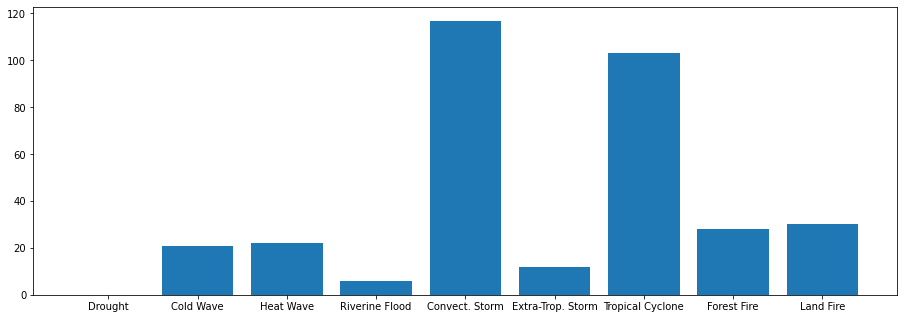

In [23]:
import matplotlib.pyplot as plt
death_fig = plt.figure()
ax = death_fig.add_axes([0,0,2,1,])
subtype = ["Drought", "Cold Wave", "Heat Wave", "Riverine Flood", "Convect. Storm", "Extra-Trop. Storm", "Tropical Cyclone", "Forest Fire", "Land Fire"]
deaths = [0,21,22,6,117,12,103,28,30]
ax.bar(subtype, deaths)
plt.show

In [24]:
injuries_df = trimmed_nw_df.groupby(["Disaster Type", "Disaster Subtype"]).agg({"Location":"count","No Injured":"sum"})
injuries_df

Location  No Injured
Disaster Type       Disaster Subtype                                      
Drought             Drought                                  1         0.0
Extreme temperature Cold wave                                1         0.0
                    Heat wave                                1         0.0
Flood               Riverine flood                           4         0.0
Storm               Convective storm                        11       361.0
                    Extra-tropical storm                     1         0.0
                    Tropical cyclone                         4        25.0
Wildfire            Forest fire                              3         0.0
                    Land fire (Brush, Bush, Pasture)         1       185.0

<function matplotlib.pyplot.show(close=None, block=None)>

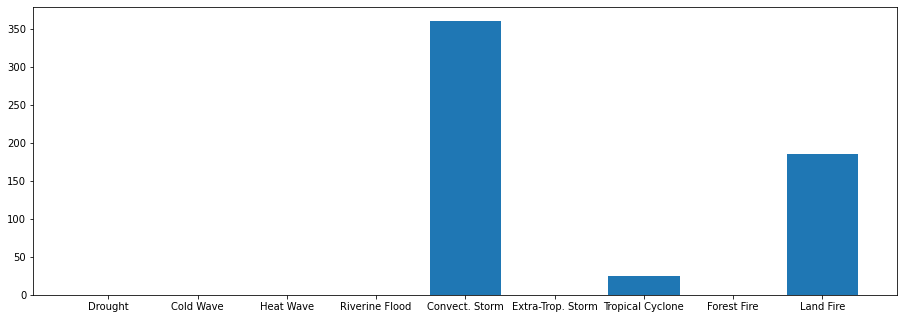

In [25]:
import matplotlib.pyplot as plt
death_fig = plt.figure()
ax = death_fig.add_axes([0,0,2,1,])
subtype = ["Drought", "Cold Wave", "Heat Wave", "Riverine Flood", "Convect. Storm", "Extra-Trop. Storm", "Tropical Cyclone", "Forest Fire", "Land Fire"]
deaths = [0,0,0,0,361,0,25,0,185]
ax.bar(subtype, deaths)
plt.show